## 导入数据和库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

#对中文字符的处理
plt.rcParams['font.sans-serif']=['SimHei']

#让坐标轴能够正常显示正负号
plt.rcParams['axes.unicode_minus']=False

#一元
data1=pd.read_csv("data_2_clean.csv")
#多元
data2=pd.read_csv("data_3_clean.csv")

#把数据随机打乱
data1.sample(frac=1).reset_index(drop=True)
data2.sample(frac=1).reset_index(drop=True)
print("")

## 定义函数

In [3]:
#正规方程
def normal_equation (data_x,data_y):
    """
    传进来的x是m*(n+1)
    y的shape是1*m
    """
    data_x=np.matrix(data_x)
    data_y=np.matrix(data_y)
    #theta=((n+1)*m*m*(n+1))^-1*((1+n)*m*m*1)=(n+1)*1
    theta=np.linalg.inv(data_x.T.dot(data_x)).dot(data_x.T.dot(data_y.T))
    return theta #(n+1)*1

#损失函数
def cost_function(theta,data_x,data_y):
    data_x=np.matrix(data_x)
    data_y=np.matrix(data_y)
    m=len(data_x)
    #1*m
    #1*(n+1)*(1+n)*m=1*m
    predict=theta.T.dot(data_x.T)
    loss=np.sum(np.power(data_y-predict,2))/len(data_y)
    
    return loss,predict

## 给数据集命名，处理数据

**划分数据集**

In [4]:
data_y_train=data1['购买金额'][:10000]
data_y_test=data1['购买金额'][10000:17723]
data_x1_train=data1[['累计购买金额']][:10000]
data_x1_test=data1[['累计购买金额']][10000:17723]
data_x2_train=data2[['购买金额','30内参加活动','距离最近一次下单天数','累计购买金额']][:10000]
data_x2_test=data2[['购买金额','30内参加活动','距离最近一次下单天数','累计购买金额']][10000:17723]

**给x增加一列x0，就是常数b**

In [7]:
#让data_x变成（n+1）列
data_x1_train.insert(0,'x0',1)
data_x1_test.insert(0,'x0',1)
data_x2_test.insert(0,'x0',1)

## 一元的线性模型

## 正规方程

- 检查data_y的shape

In [8]:
data_y_train.shape

(10000,)

- 上面已经，给data_x增加一列，代表常系数b,也就是x0

In [8]:
data_x2_train.drop('30内参加活动',axis=1)

,购买金额,距离最近一次下单天数,累计购买金额
0,72.98,4.26,2343.870
1,200.99,0.94,8539.872
2,69.98,4.29,1687.646
3,319.99,15.13,2811.491
4,140.00,11.45,769.990
...,...,...,...
9995,1034.29,14.74,1138.160
9996,538.98,8.52,4031.560
9997,161.99,22.16,1049.510
9998,87.26,8.74,805.992


## 进行运算

- 一元数据的获取，包括loss和predict，并且进行打印检查

In [9]:
theta_1=normal_equation(data_x1_train,data_y_train)
loss_1,predict_1=cost_function(theta_1,data_x1_train,data_y_train)
loss_1

4247042374.423563

In [10]:
theta_1

matrix([[2.29403041e+02],
        [5.69358052e-02]])

In [11]:
predict_1

matrix([[362.85316678, 715.62752954, 325.49052497, ..., 289.15773799,
         275.29284459, 351.11471183]])

## 画图(一元）

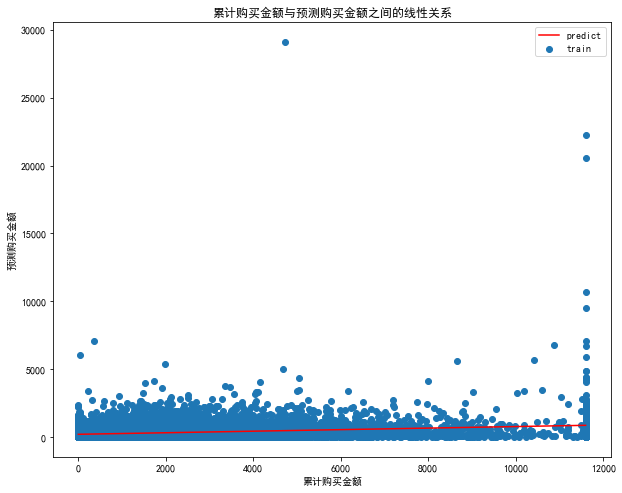

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(x=data_x1_train['累计购买金额'],y=data_y_train,label="train")

plt.xlabel('累计购买金额')
plt.ylabel('预测购买金额')
plt.title("累计购买金额与预测购买金额之间的线性关系")

#画预测线，线性
min_x,max_x=np.min(data_x1_train['累计购买金额']),np.max(data_x1_train['累计购买金额'])
#data_x=m*(n+1) thata=(1+n)*1

y=predict_1
min_y,max_y=np.min(y),np.max(y)

plt.plot((min_x,max_x),(min_y,max_y),'r',label='predict')

plt.legend(loc='best')
plt.show()

## 模型评估（一元）

**均方误差**

In [13]:
#均方误差，就是loss
#theta_1是（n+1）*1,data_x是m*(1+n),data_y是m*1

MSE=np.sum(np.power(np.matrix(data_y_test)-np.matrix(data_x1_test).dot(theta_1),2))/len(data_y_test)
MSE

3272837877.772621

本来train的数据，loss只有4247042374,（虽然我也感觉挺大的...用test，更大..）

**均方根误差**

In [14]:
RMSE=math.sqrt(MSE)
RMSE

57208.72204281984

**可决系数**

In [15]:
R1=np.sum(np.power(np.matrix(data_y_test)-np.matrix(data_x1_test).dot(theta_1),2))
R2=np.sum(np.power(np.matrix(data_y_test)-np.matrix(data_y_test.mean()),2))
R=1-(R1/R2)
R

-8178.2667037511965

**浅画一下test的数据点和拟合情况**

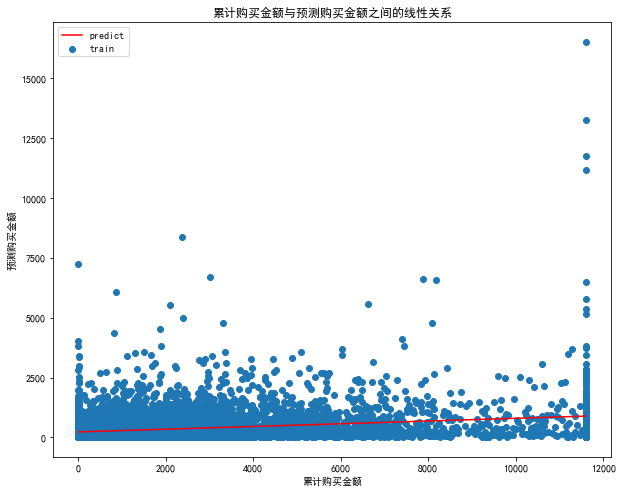

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(data_x1_test['累计购买金额'],y=data_y_test,label="train")

plt.xlabel('累计购买金额')
plt.ylabel('预测购买金额')
plt.title("累计购买金额与预测购买金额之间的线性关系")

#画预测线，线性
min_x,max_x=np.min(data_x1_test['累计购买金额']),np.max(data_x1_test['累计购买金额'])
#data_x=m*(n+1) thata=(1+n)*1

y=np.matrix(data_x1_test).dot(theta_1)
min_y,max_y=np.min(y),np.max(y)

plt.plot((min_x,max_x),(min_y,max_y),'r',label='predict')

plt.legend(loc='best')
plt.show()

**说明一元拟合容易误差较大，其实也容易理解，在数据清洗的时候虽然相关系数都不是很大，但是也有几个特征是正数且也十分接近这个“累计购买金额”的相关系数**

# 尝试特征缩放

- 归一化数据之后再带入方程

In [17]:
data_x1_min=data_x1_train.min()
data_x1_max=data_x1_train.max()
data_x1_train=(data_x1_train-data_x1_min)/(data_x1_max-data_x1_min)

data_y_min=data_y_train.min()
data_y_max=data_y_train.max()
data_y_train=(data_y_train-data_y_min)/(data_y_max-data_y_min)

data_x1_train=data_x1_train.drop('x0',axis=1)
data_x1_train.insert(0,'x0',1)

In [18]:
data_x1_train

,x0,累计购买金额
0,1,0.202094
1,1,0.736329
2,1,0.145513
3,1,0.242414
4,1,0.066390
...,...,...
9995,1,0.098135
9996,1,0.347611
9997,1,0.090491
9998,1,0.069495


## 再进行以上有过的操作

- 进行一元loss，theta的获取

In [19]:
theta_1=normal_equation(data_x1_train,data_y_train)
loss_1,predict_1=cost_function(theta_1,data_x1_train,data_y_train)
loss_1

5.021974374283507

In [20]:
theta_1

matrix([[0.00788779],
        [0.02270695]])

In [21]:
predict_1

matrix([[0.01247673, 0.02460758, 0.01119195, ..., 0.00994257, 0.0094658 ,
         0.01207308]])

- 画图

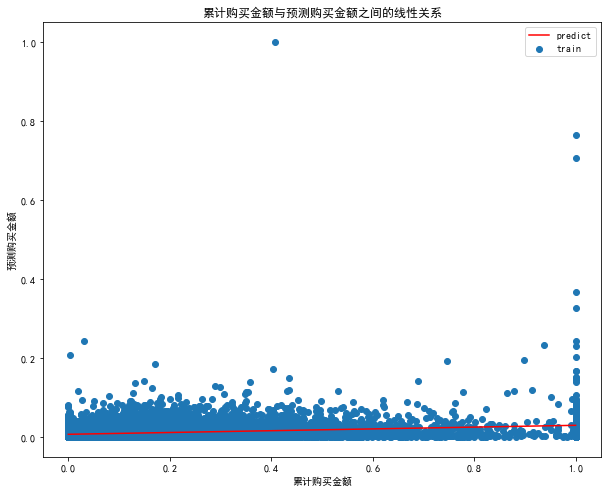

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(x=data_x1_train['累计购买金额'],y=data_y_train,label="train")

plt.xlabel('累计购买金额')
plt.ylabel('预测购买金额')
plt.title("累计购买金额与预测购买金额之间的线性关系")

#画预测线，线性
min_x,max_x=np.min(data_x1_train['累计购买金额']),np.max(data_x1_train['累计购买金额'])
#data_x=m*(n+1) thata=(1+n)*1

y=predict_1
min_y,max_y=np.min(y),np.max(y)

plt.plot((min_x,max_x),(min_y,max_y),'r',label='predict')

plt.legend(loc='best')
plt.show()

## 模型评估

- 均方误差

In [23]:
#均方误差，就是loss
#theta_1是（n+1）*1,data_x是m*(1+n),data_y是m*1

MSE=np.sum(np.power(np.matrix(data_y_train)-np.matrix(data_x1_train).dot(theta_1),2))/len(data_y_train)
MSE

5.458173688792235

- 可决系数

In [24]:
R1=np.sum(np.power(np.matrix(data_y_test)-np.matrix(data_x1_test).dot(theta_1),2))
R2=np.sum(np.power(np.matrix(data_y_test)-np.matrix(data_y_test.mean()),2))
R=1-(R1/R2)
R

-10026.888937391217

In [25]:
R1=np.sum(np.power(np.matrix(data_y_train)-np.matrix(data_x1_train).dot(theta_1),2))
R2=np.sum(np.power(np.matrix(data_y_train)-np.matrix(data_y_train.mean()),2))
R=1-(R1/R2)
R

-10415.214839602828

**总结：**

降维能一定程度上让数据拟合得更好，能降低误差、

## 多元的线性模型

In [26]:
data_x2_train=data_x2_train.drop(['30内参加活动'],axis=1)

In [27]:
data_x2_train

,购买金额,距离最近一次下单天数,累计购买金额
0,72.98,4.26,2343.870
1,200.99,0.94,8539.872
2,69.98,4.29,1687.646
3,319.99,15.13,2811.491
4,140.00,11.45,769.990
...,...,...,...
9995,1034.29,14.74,1138.160
9996,538.98,8.52,4031.560
9997,161.99,22.16,1049.510
9998,87.26,8.74,805.992


## 先对数据进行标准化

In [28]:
data_x2_train=(data_x2_train-data_x2_train.mean())/data_x2_train.std()
data_y_train=(data_y_train-data_y_train.mean())/data_y_train.std()

In [29]:
data_y_train
data_x2_train

data_x2_train.insert(0,'x0',1)

## 正规方程

- 多元数据的获取，包括loss以及predict，并且进行打印检查

In [30]:
theta_2=normal_equation(data_x2_train,data_y_train)
loss_2,predict_2=cost_function(theta_2,data_x2_train,data_y_train)
loss_2

1.5946637556570087e-27

In [31]:
theta_2
#（n+1）*1

matrix([[ 3.74294262e-14],
        [ 1.00000000e+00],
        [-1.38777878e-17],
        [-2.77555756e-17]])

In [32]:
predict_2.shape
#1*m

(1, 10000)

In [33]:
data_y_train

0      -0.451684
1      -0.259398
2      -0.456191
3      -0.080647
4      -0.351012
          ...   
9995    0.992315
9996    0.248302
9997   -0.317981
9998   -0.430234
9999    0.216772
Name: 购买金额, Length: 10000, dtype: float64

**用test的数据来测试**

**前面已经使用了MSE，这次来试试残差图评估**

In [34]:
y1=np.matrix(data_y_train)
y2=predict_2
y=(y1)-(y2)
print(y1.shape)
print(y2.shape)
print(y.shape)
y=y.tolist()

(1, 10000)
(1, 10000)
(1, 10000)


In [35]:
data_x2=data_x2_train.drop('x0',axis=1)
data_x2

,购买金额,距离最近一次下单天数,累计购买金额
0,-0.451684,-0.488237,-0.079706
1,-0.259398,-1.025801,2.517711
2,-0.456191,-0.483380,-0.354801
3,-0.080647,1.271797,0.116325
4,-0.351012,0.675944,-0.739490
...,...,...,...
9995,0.992315,1.208650,-0.585150
9996,0.248302,0.201528,0.627788
9997,-0.317981,2.410072,-0.622313
9998,-0.430234,0.237150,-0.724398


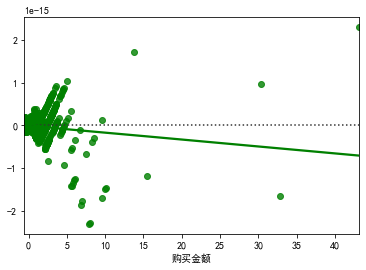

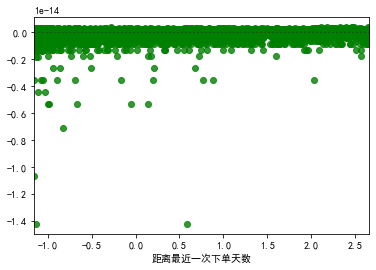

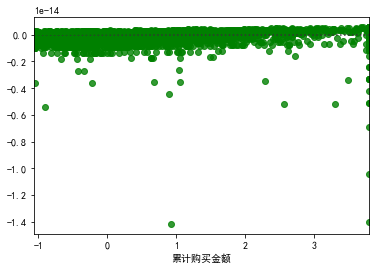

In [36]:
for i in data_x2.columns.tolist():
    sns.residplot(x=i,y=y,lowess=True,color="g",data=data_x2)
    plt.show() 

**前期对购买金额计算相关系数的时候，也是偏小，但是相较其他数据算作还行，现在拟合出来的结果显示这个相关不大，因此需要把他删除**

In [37]:
data_x2_train=data_x2_train.drop('购买金额',axis=1)
data_x2_train=data_x2_train.drop('x0',axis=1)
data_x2_train.insert(1,'x0',1)

# 梯度下降（多元）

 - **画图**，跟踪theta变化并且画出theta，以及在数据集点上画出拟合的线(一元）

In [38]:
def decline_gradient(data_x,data_y,alpha,interations):
    #初始化theta
    n=data_x.shape[1]
    theta=np.zeros((1,n))
    temp=np.matrix(np.zeros(theta.shape))
    
    #初始化loss
    loss=np.zeros(interations)
    
    #让x，y变成矩阵
    data_x=np.matrix(data_x)
    data_y=np.matrix(data_y)
    
    for i in range(0, interations):
        # 每次迭代根据上一次算出的新的theta更新一遍误差
        # x=m*(1+n),theta=(n+1)*1,data_y=m*1
        #deviation是损失的意思
        deviation= (data_x.dot(theta.T))-data_y
        gradient= np.sum(data_x.T.dot(deviation))#(n+1)*1
        theta=theta- ((alpha / len(data_y)) * gradient)
            
        
        inner=data_x.dot(theta.T)-data_y
        loss[i]=np.sum(inner)/len(data_x)
    return theta,loss

In [39]:
theta_3,loss=decline_gradient(data_x2_train,data_y_train,0.0000000000001,100)

In [40]:
theta_3

array([[-4.02538171e-18, -4.02538171e-18, -4.02538171e-18]])

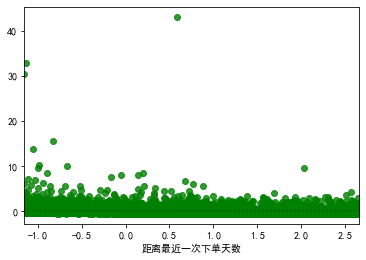

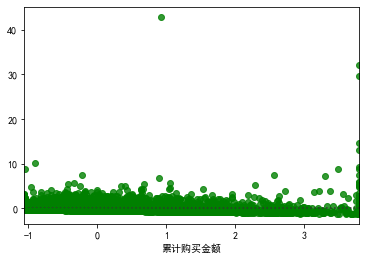

In [41]:
predict_3=theta_3.dot(data_x2_train.T)
y1=np.matrix(data_y_train)
pradict_3=np.matrix(predict_3)

y=(y1)-(predict_3)# 1*m-1*m

y=y.tolist()
data_2=data_x2_train.drop('x0',axis=1)
for i in data_2.columns.tolist():
    sns.residplot(x=i,y=y,lowess=True,color="g",data=data_x2_train)
    plt.show() 

**效果不错~**

## 画loss函数查看是否收敛

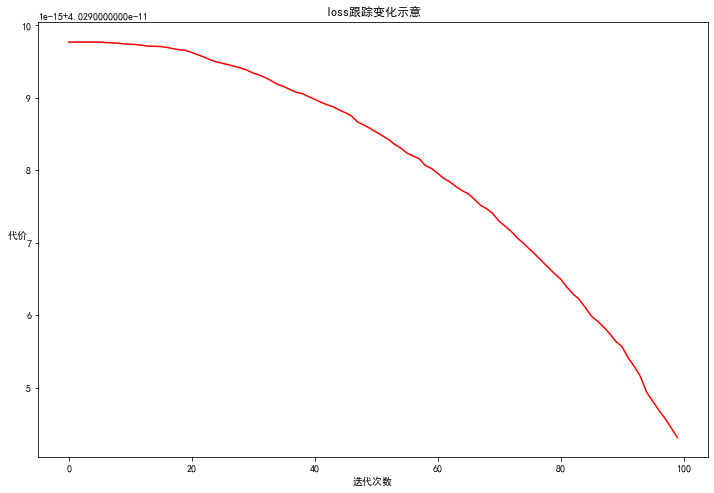

In [42]:
loss_max,loss_min=loss.max(),loss.min()
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(100),loss,'r')
ax.set_xlabel('迭代次数')
ax.set_ylabel('代价',rotation=0)
ax.set_title('loss跟踪变化示意')
plt.show()

梯度下降，theta接近预期，迭代次数变多，theta即可获得与正规方程相近的结果